# Grid Loss Prediction dataset

## Contents of dataset
The dataset contains the following features that are useful for our prediction:
1. Grid loss: historical measurements of grid loss in MWh
2. Grid load: historical measurements of grid load in MWh
3. Temperature forecast in Kelvin
4. Predictions using the Prophet model in MWh
5. Trend, daily, weekly and yearly components of the grid loss, also from the Prophet Model.

Grid loss is directly correlated with the total amount of power in the grid, which is also known as the grid load.

The dataset is already split into two parts: training and testing set.

Training set:
This file (train.csv) contains two years of data (December 2017 to November 2019). All the features mentioned above are provided for this duration.

Test set:
This file (test.csv) contains six months of data (December 2019 to May 2020). All the features from training data are provided for the test set as well. Occasionally, some of the features could be missing (the predictions are missing in the beggining).

Additionally, a copy of test dataset is provided (test_backfilled_missing_features.csv) where the missing features are backfilled.

## Exploratory Analysis
To be able to present features of the dataset we will use `matplotlib` to create useful plots and visualize the data. (For now only a simple plot will be presented - could be expanded)

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore') # hide warnings

There are 3 csv files in the version of the dataset available on Kaggle:

In [2]:
print("Available spreadsheets:")
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(filename)

Available spreadsheets:
test.csv
test_backfilled_missing_data.csv
train.csv


## Functions
The next code cells define functions for cleaning data and providing features(could be changed in the future)

In [3]:
def cleanData(df):
    df = df[df['has incorrect data'] == False] # remove data that is labeled incorrect
    df = df.select_dtypes(include = [np.number]) # keep only numerical columns
    return df

In [4]:
def getFeature(df, number, feature):
    df = df[f'grid{number}-{feature}']
    df = df.dropna() #if there is any NaN data in the feature, remove it (in the loss feature there isn't but this is safety for future)
    return df

In [5]:
def plotFeature(fd, wf, fu):
    fd.plot(figsize=(30,10), label = f'{wf}', linewidth = 1)
    plt.title(f'Grid {wf} historic data', fontsize=20)
    plt.xlabel('Date and time', fontsize=18)
    plt.ylabel(f'Grid {wf} ({fu})', fontsize=18)
    plt.xticks(fontsize=14)
    plt.legend()

Now you're ready to read in the data and use the plotting functions to visualize the data.

### Use case with train set

In [12]:
name_of_data = 'train' #choose the appropriate data (train, test or test_backfilled_missing_data)
nRowsRead = None # choose number of rows (use None to display all rows)
grid_number = 1 # choose grid number (current dataset has data from 3 grids so you can choose between 1,2 or 3)
wanted_feature = 'loss' # choose name of feature (could be load, loss, temp, or predictive values)
feature_unit = 'MWh' # change to Kelvin if the feature is temp (temperature)

In [13]:
data = pd.read_csv(f'./data/{name_of_data}.csv', index_col=0, nrows = nRowsRead)
nRow, nCol = data.shape
print(f'At first there are {nRow} rows and {nCol} columns')
data = cleanData(data)

At first there are 17520 rows and 38 columns


After cleaning and extracting the loss for grid 1, there are 15014 data points available for use


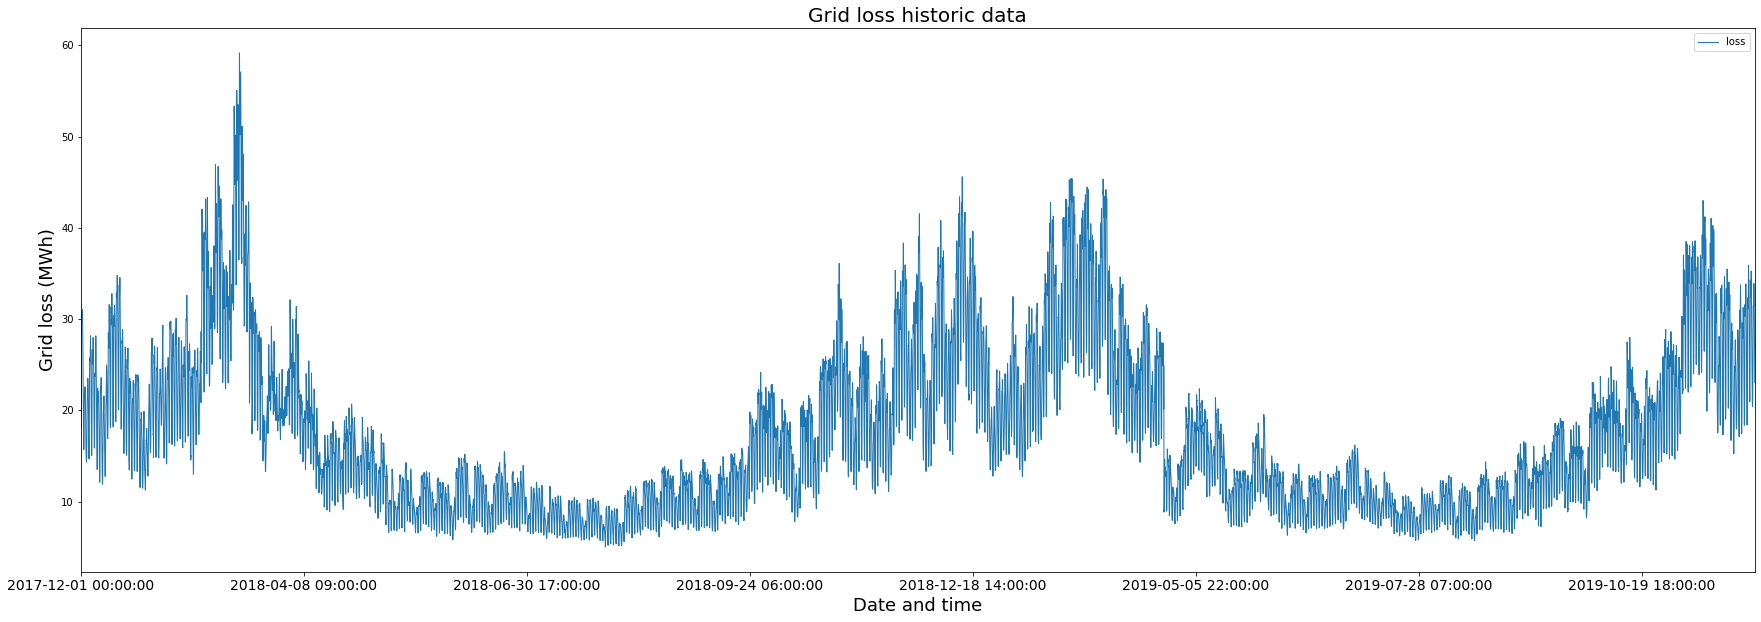

In [14]:
feature_data = getFeature(data, grid_number, wanted_feature)
nRow,  = feature_data.shape
print(f"After cleaning and extracting the {wanted_feature} "
        f"for grid {grid_number}, there are {nRow} " 
        "data points available for use")
plotFeature(feature_data, wanted_feature, feature_unit)

#loss_train = data[f'grid{grid_number}-loss']
#result = pd.merge(load_train, loss_train,left_index=True,right_index=True)
#result.plot(subplots=True, figsize=(30,10))